<a href="https://colab.research.google.com/github/ankita2004-anks41/IMAGE_recognitio--ML/blob/main/Build_AI_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ankitaanks","key":"64801816e66599019b5331727714d588"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [7]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28), Test shape: (10000, 28, 28)


In [8]:
x_train = x_train/ 255.0
x_test = x_test/ 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print(f"Train reshaped: {x_train.shape}")

Train reshaped: (60000, 28, 28, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

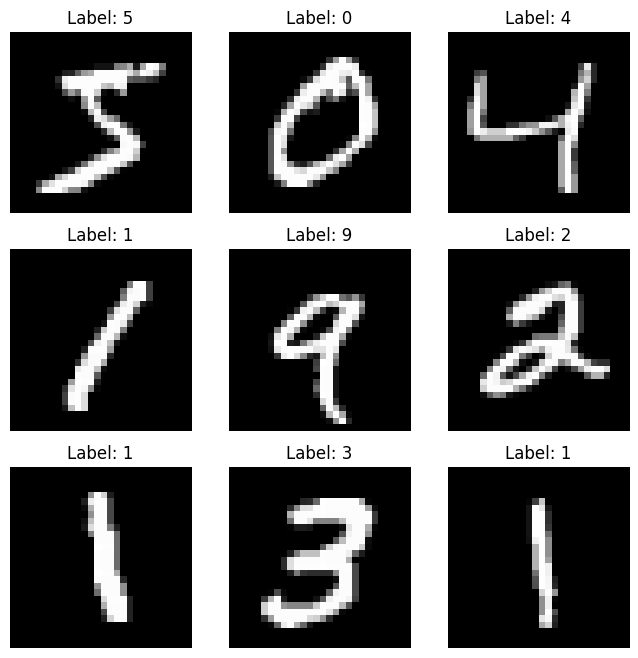

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
   plt.subplot(3,3,i+1)
   plt.imshow(x_train[i].reshape(28,28), cmap='gray')
   plt.title(f"Label: {y_train[i]}")
   plt.axis('off')
plt.show

In [10]:
 (x_train_c10, y_train_c10), (x_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
x_train_c10 = x_train_c10/ 255.0
x_test_c10 = x_test_c10/ 255.0
print(f" CIFAR-10 train shape: {x_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
 CIFAR-10 train shape: (50000, 32, 32, 3)


In [11]:
##day 2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten( ),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')

])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary( )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8973 - loss: 0.3407 - val_accuracy: 0.9799 - val_loss: 0.0673
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9850 - loss: 0.0485 - val_accuracy: 0.9871 - val_loss: 0.0433
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9890 - loss: 0.0327 - val_accuracy: 0.9882 - val_loss: 0.0414
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9935 - loss: 0.0203 - val_accuracy: 0.9904 - val_loss: 0.0332
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9958 - loss: 0.0134 - val_accuracy: 0.9894 - val_loss: 0.0390


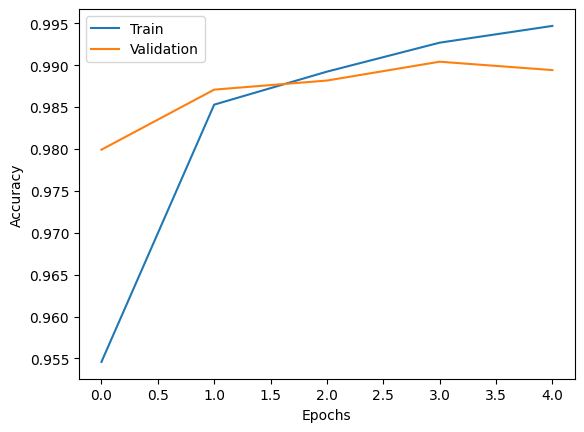

In [13]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'],
            label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend( )
plt.show( )

In [14]:
test_loss, test_acc=model.evaluate(x_test, y_test)
print("Test accuracy: {test_acc: .4f}")
y_pred=model.predict(x_test) . argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9871 - loss: 0.0374
Test accuracy: {test_acc: .4f}
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [15]:
#dropout
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten( ),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')

])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
##day 3  we are making more images by rotaing,width etc. that is recognising images at differnt angles.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen=  ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,

)
datagen.fit(x_train_c10)

In [17]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    BatchNormalization( ),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten( ),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')

])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(datagen.flow(x_train_c10, y_train_c10, batch_size=32), epochs=10, validation_data=(x_test_c10, y_test_c10))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 21ms/step - accuracy: 0.3344 - loss: 1.7968 - val_accuracy: 0.5357 - val_loss: 1.3156
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.5247 - loss: 1.3282 - val_accuracy: 0.4430 - val_loss: 1.7606
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.5759 - loss: 1.2021 - val_accuracy: 0.6304 - val_loss: 1.0569
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6049 - loss: 1.1289 - val_accuracy: 0.5828 - val_loss: 1.2171
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6262 - loss: 1.0681 - val_accuracy: 0.6440 - val_loss: 1.0683
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.6408 - loss: 1.0357 - val_accuracy: 0.6541 - val_loss: 1.0211
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.6507 - loss: 0.9974 - val_accuracy: 0.5465 - val_loss: 1.4270
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.6630 - loss: 0.98

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1000
           1       0.79      0.89      0.84      1000
           2       0.76      0.51      0.61      1000
           3       0.58      0.41      0.48      1000
           4       0.71      0.64      0.67      1000
           5       0.58      0.69      0.63      1000
           6       0.82      0.74      0.78      1000
           7       0.62      0.85      0.72      1000
           8       0.85      0.76      0.80      1000
           9       0.73      0.87      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



<function matplotlib.pyplot.show(close=None, block=None)>

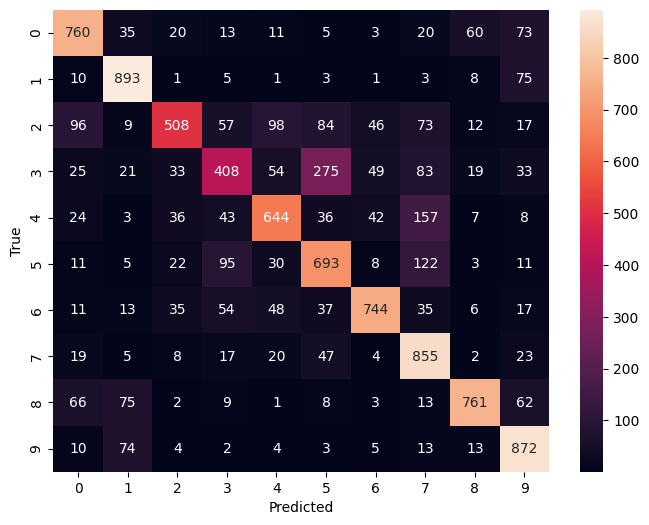

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred_c10= model.predict(x_test_c10).argmax(axis=1)
cm=confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')     #where density is more we use heatmap.
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show

In [19]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 54% 117M/218M [00:00<00:00, 1.22GB/s]
100% 218M/218M [00:00<00:00, 756MB/s] 


In [20]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dogs-vs-cats')

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen=  ImageDataGenerator( rescale=1./255, validation_split= 0.2)
train_generator=datagen.flow_from_directory('/content/dogs-vs-cats/',target_size=(224,224),batch_size=32,
                                            class_mode='binary',subset='training')
val_generator=datagen.flow_from_directory('/content/dogs-vs-cats/',target_size=(224,224),batch_size=32,
                                            class_mode='binary',subset='validation')

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [22]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense



base_model=MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable=False

model=Sequential([
    base_model,
    GlobalAveragePooling2D( ),
    Dense(128,activation='relu'),
    Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=5, validation_data=val_generator)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 39s 121ms/step - accuracy: 0.7862 - loss: 0.5446 - val_accuracy: 0.7985 - val_loss: 0.5294
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.7943 - loss: 0.5019 - val_accuracy: 0.7985 - val_loss: 0.5132
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.8014 - loss: 0.4891 - val_accuracy: 0.7985 - val_loss: 0.5186
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.8014 - loss: 0.4675 - val_accuracy: 0.7955 - val_loss: 0.5250
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.8169 - loss: 0.4299 - val_accuracy: 0.7915 - val_loss: 0.5394


In [23]:
base_model.trainable=True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=3, validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 97s 216ms/step - accuracy: 0.8005 - loss: 0.4815 - val_accuracy: 0.7935 - val_loss: 0.5341
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 31s 122ms/step - accuracy: 0.8025 - loss: 0.4513 - val_accuracy: 0.7950 - val_loss: 0.5345
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 31s 123ms/step - accuracy: 0.8068 - loss: 0.4183 - val_accuracy: 0.7960 - val_loss: 0.5346


In [26]:
model.save('mobilenet_cats_dogs.h5')
#to load to our system again
import tensorflow as tf
loaded_model=tf.keras.models.load_model('mobilenet_cats_dogs.h5')

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step


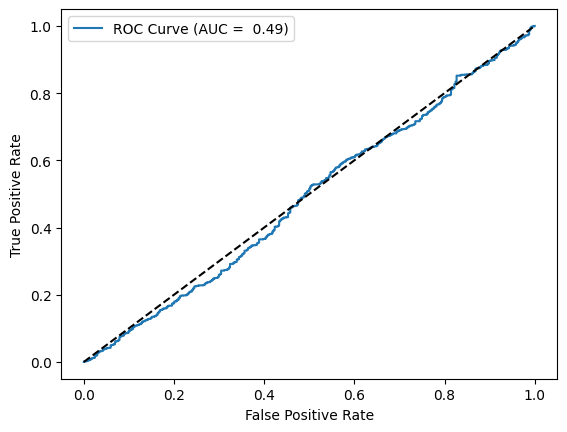

In [31]:
from sklearn.metrics import roc_curve, auc
y_pred_proba= loaded_model.predict(val_generator)
fpr,tpr, _ = roc_curve(val_generator.classes, y_pred_proba)

roc_auc= auc(fpr,tpr)
plt.plot(fpr,tpr, label=f'ROC Curve (AUC = {roc_auc: .2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend( )
plt.show( )


In [36]:
from google.colab import files
uploaded = files.upload( )

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = 'download.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

predictions = loaded_model.predict(img_array)
print("Predicted class:", "Dog" if predictions[0][0] > 0.5 else "Cat")

Saving download.jpg to download.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted class: Dog


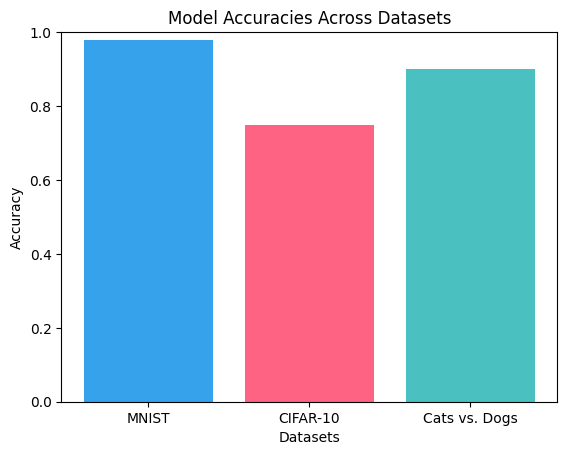

In [37]:
import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies = [0.98, 0.75, 0.90]
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
plt.xlabel('Datasets')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Across Datasets')
plt.ylim(0,1)
plt.show()